In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
from scipy import stats
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from scipy.stats import norm, kurtosis,skew,normaltest,kstest,anderson,shapiro,probplot,t
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.optimize import minimize

In [149]:
# Problem 1
Skew_series=[]
Kurtosis_series=[]
Total_skew=0
Total_kurtosis=0

for _ in range(0,1000):
    StandardNormalSeries=np.random.normal(loc=0, scale=1, size=10)
    Total_skew += skew(StandardNormalSeries)
    Skew_series.append(skew(StandardNormalSeries))
    Total_kurtosis += kurtosis(StandardNormalSeries)
    Kurtosis_series.append(kurtosis(StandardNormalSeries))
    
Estimated_skew = Total_skew/1000
Estimated_kurtosis= Total_kurtosis/1000
Var_skew= np.var(Skew_series)
Var_kurtosis=np.var(Kurtosis_series)

t_skew= Estimated_skew/((Var_skew/1000)**(1/2))
t_kurtosis = Estimated_kurtosis/((Var_kurtosis/1000)**(1/2))
    


In [150]:
t_sk,pvalue_sk =stats.ttest_1samp(Skew_series, 0)
print("Skewness Test:")
print("T value of skewness is " +str(t_sk)+", the p value of skewness is "+str(pvalue_sk))
if abs(t_sk)>=1.96:
    print("So, significantly biased")
else:
    print("So, insignificantly biased")

Skewness Test:
T value of skewness is 1.2184699218115365, the p value of skewness is 0.22333311454388746
So, insignificantly biased


In [151]:
t_kurt,pvalue_kurt = stats.ttest_1samp(Kurtosis_series, 0)
print("Kurtosis Test:")
print("T value of kurtosis is "+str(t_kurt)+", the p value of kurtosis is "+str(pvalue_kurt))
if abs(t_kurt)>=1.96:
    print("So, significantly biased")
else:
    print("So, insignificantly biased")


Kurtosis Test:
T value of kurtosis is -23.051155894849412, the p value of kurtosis is 1.288524162962821e-94
So, significantly biased


In [42]:
# Problem 2
problem2_row_df = pd.read_csv("./problem2.csv")
x = problem2_row_df['x']
y = problem2_row_df['y']

X=sm.add_constant(x)
olsmodel = sm.OLS(y,X)
results = olsmodel.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           4.34e-06
Time:                        15:47:50   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1198      0.121      0.990      0.3

C:\Users\98317\AppData\Local\Temp\ipykernel_20856\1168079804.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(error_vector, shade=True, color="red")


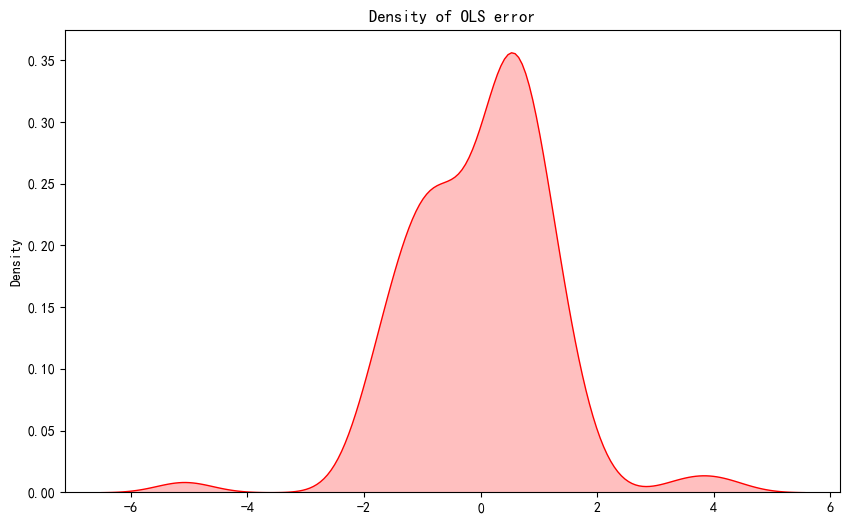

In [227]:
y_fitted = results.fittedvalues
error_vector=y-y_fitted
Alpha=results.params[0]
Beta=results.params[1]
error = y - x*Beta - Alpha

plt.figure(figsize=(10,6))
sns.kdeplot(error_vector, shade=True, color="red")
plt.title('Density of OLS error')
plt.show()


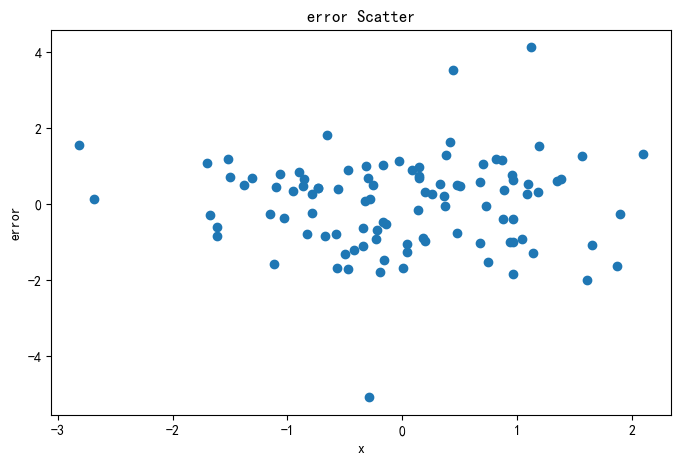

In [57]:
plt.figure(figsize = (8,5))
plt.xlabel("x") 
plt.ylabel("error")
plt.scatter(x, error_vector)
plt.title("error Scatter")
plt.show()

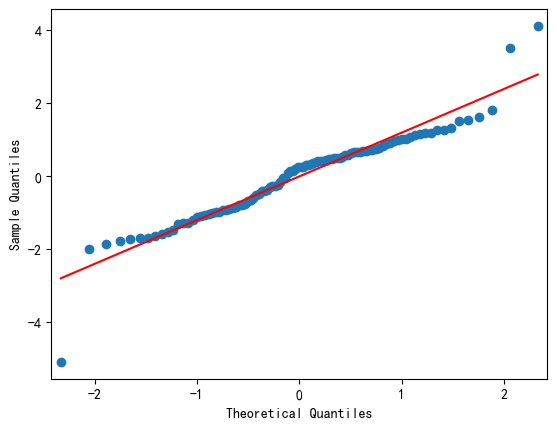

In [55]:
sm.qqplot(error_vector, line='s')
plt.show()

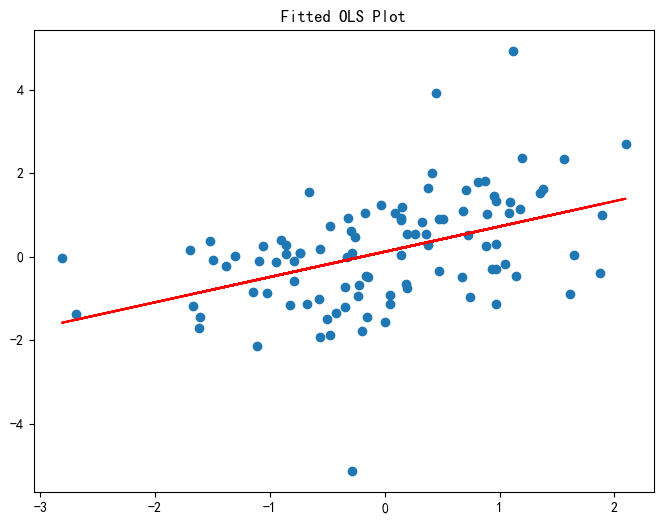

In [228]:
plt.figure(figsize = (8,6))
plt.plot(x, y_fitted,'red')
plt.scatter(x, y)
plt.title("Fitted OLS Plot")
plt.show()

In [195]:
# OLS: test Normal distribution
# test 1: scipy.stats.normaltest
print("The result of using normaltest:")
stats, pvalue = normaltest(error_vector)
print("stats = "+str(stats) +", and the pvalue = "+str(pvalue))
if pvalue > 0.05:
    print("The error vector is normally distributed")
else:
    print("The error vector is not normally distributed")
print("=======================================================")

# test 2: kstest(x, 'norm')
print("The result of using kstest:")
kstest(error_vector, 'norm')
print("stats = "+str(stats) +", and the pvalue = "+str(pvalue))
if pvalue > 0.05:
    print("The error vector is normally distributed")
else:
    print("The error vector is not normally distributed")
print("=======================================================")

# test 3: Anderson-Darling test
print("The result of using Anderson-Darling:")
anderson(error_vector, dist='norm')
print("stats = "+str(stats) +", and the pvalue = "+str(pvalue))
if pvalue > 0.05:
    print("The error vector is normally distributed")
else:
    print("The error vector is not normally distributed")
print("=======================================================")

# test 4: Shapiro-Wilk test
print("The result of using Shapiro-Wilk test:")
shapiro(error_vector)
print("stats = "+str(stats) +", and the pvalue = "+str(pvalue))
if pvalue > 0.05:
    print("The error vector is normally distributed")
else:
    print("The error vector is not normally distributed")


The result of using normaltest:
stats = 14.146365351261274, and the pvalue = 0.0008475313945909519
The error vector is not normally distributed
The result of using kstest:
stats = 14.146365351261274, and the pvalue = 0.0008475313945909519
The error vector is not normally distributed
The result of using Anderson-Darling:
stats = 14.146365351261274, and the pvalue = 0.0008475313945909519
The error vector is not normally distributed
The result of using Shapiro-Wilk test:
stats = 14.146365351261274, and the pvalue = 0.0008475313945909519
The error vector is not normally distributed


In [225]:
# MLE

x = problem2_row_df['x']
y = problem2_row_df['y']

# Given the assumption of normality

def MLE_norm(pars, x, y):
    y_est = pars[0]*x + pars[1]
    errors = y - y_est
    sigma = pars[2] 
    ll = -np.log(sigma*np.sqrt(2*np.pi)) - ((errors)**2)/(2*sigma**2)
    return -ll.sum()

# Given the assumption of t-distribution

def MLE_t(pars, x, y):
    y_est = pars[0]*x + pars[1]
    errors = y - y_est
    df = pars[2]
    scale=pars[3]
    ll = np.log(t.pdf(errors, df=df,scale=scale)) 
    return -ll.sum()

pars_norm = [1,1,1] 

norm_MLE_res = minimize(MLE_norm, pars_norm, args=(x, y))
norm_Pars = norm_MLE_res.x

pars_t=[1,1,1,1]
t_MLE_res = minimize(MLE_t, pars_t, args=(x, y))
t_Pars = t_MLE_res.x

print("Given the assumption of normal distribution, MLE parameters are:", norm_Pars[:3])
print("Given the assumption of t-distribution, MLE parameters are:", t_Pars)

Given the assumption of normal distribution, MLE parameters are: [0.60520484 0.11983623 1.1983941 ]
Given the assumption of t-distribution, MLE parameters are: [0.55757182 0.14261399 6.27658083 0.97126631]


In [226]:
# Choice of Model

def AICs(k,LL,n):
    AIC=2*k+2*LL
    AICc=AIC+(2*k*k+2*k)/(n-k-1)
    
    AICs=[]
    AICs.append(AIC)
    AICs.append(AICc)
    
    return AICs

def BIC(k,LL,n):
    BIC=np.log(n)*k+2*LL
    return BIC


print("if Normal distribution, AIC = "+str(AICs(3,norm_MLE_res.fun,len(y))[0])," , AICc = "+str(AICs(3,norm_MLE_res.fun,len(y))[1])+ " , BIC = "+str(BIC(3,norm_MLE_res.fun,len(y))))
print("if t distribution, AIC = "+str(AICs(4,t_MLE_res.fun,len(y))[0])," , AICc = "+str(AICs(4,norm_MLE_res.fun,len(y))[1])+ " , BIC = "+str(BIC(4,norm_MLE_res.fun,len(y))))

if AICs(3,norm_MLE_res.fun,len(y))[1] > AICs(4,t_MLE_res.fun,len(y))[1]:
    print("According to AICc, t distribution performs better")
else:
    print("According to AICc, normal distribution performs better")

if BIC(3,norm_MLE_res.fun,len(y)) > BIC(4,t_MLE_res.fun,len(y)):
    print("According to BIC, t distribution performs better")
else:
    print("According to BIC, normal distribution performs better")

if Normal distribution, AIC = 325.98419337832485  , AICc = 326.23419337832485 , BIC = 333.7997039362891
if t distribution, AIC = 318.94594082499174  , AICc = 328.4052460099038 , BIC = 338.4048741222772
According to AICc, t distribution performs better
According to BIC, t distribution performs better


In [186]:
# Problem 3
# Method 1 : simulate manually

def ARMA_plot(title,data,lag):  
    data = pd.Series(data)
        
    with plt.style.context('ggplot'):  
        plt.rc('font', size=45)   
        fig = plt.figure(figsize=(40, 32))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        data.plot(ax=ts_ax)
        ts_ax.set_title(title)
        plot_acf(data, lags=lag, ax=acf_ax, alpha=0.05)
        acf_ax.set_ylim(-0.4,1.1)
        acf_ax.set_title('AutoCovariance Plot')
        plot_pacf(data, lags=lag, ax=pacf_ax, alpha=0.05)
        pacf_ax.set_ylim(-0.4,1.1)
        pacf_ax.set_title('Partial AutoCovariance Plot')
        sm.qqplot(data, line='s', ax=qq_ax)
        qq_ax.set_title('QQ plot')        
        probplot(data, sparams=(data.mean(), 
                     data.std()), plot=pp_ax)
        pp_ax.set_title('PP plot') 
        plt.tight_layout()
    return

def AR1_process(pars):
    y=[]
    y0 = np.random.randn(1)[0]
    y.append(y0)
    
    for i in range(1,2001):
        y.append(np.random.randn(1)[0]+pars*y[i-1])
   
    title="AR(1)"
    ARMA_plot(title,y,30)
    
def AR2_process(pars):
    y=[]
    y0 = np.random.randn(1)[0]
    y1=np.random.randn(1)[0]
    y.append(y0)
    y.append(y1)
    
    for i in range(2,2001):
        y.append(np.random.randn(1)[0]+pars[0]*y[i-1]+pars[1]*y[i-2])   
    title="AR(2)"
    ARMA_plot(title,y,30)

def AR3_process(pars):
    y=[]
    y0 = np.random.randn(1)[0]
    y1=np.random.randn(1)[0]
    y.append(y0)
    y.append(y1)
    
    for i in range(2,2001):
        y.append(np.random.randn(1)[0]+pars[0]*y[i-1]+pars[1]*y[i-2]+pars[2]*y[i-3])   
    title="AR(3)"
    ARMA_plot(title,y,30)



c:\Users\98317\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\98317\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\98317\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


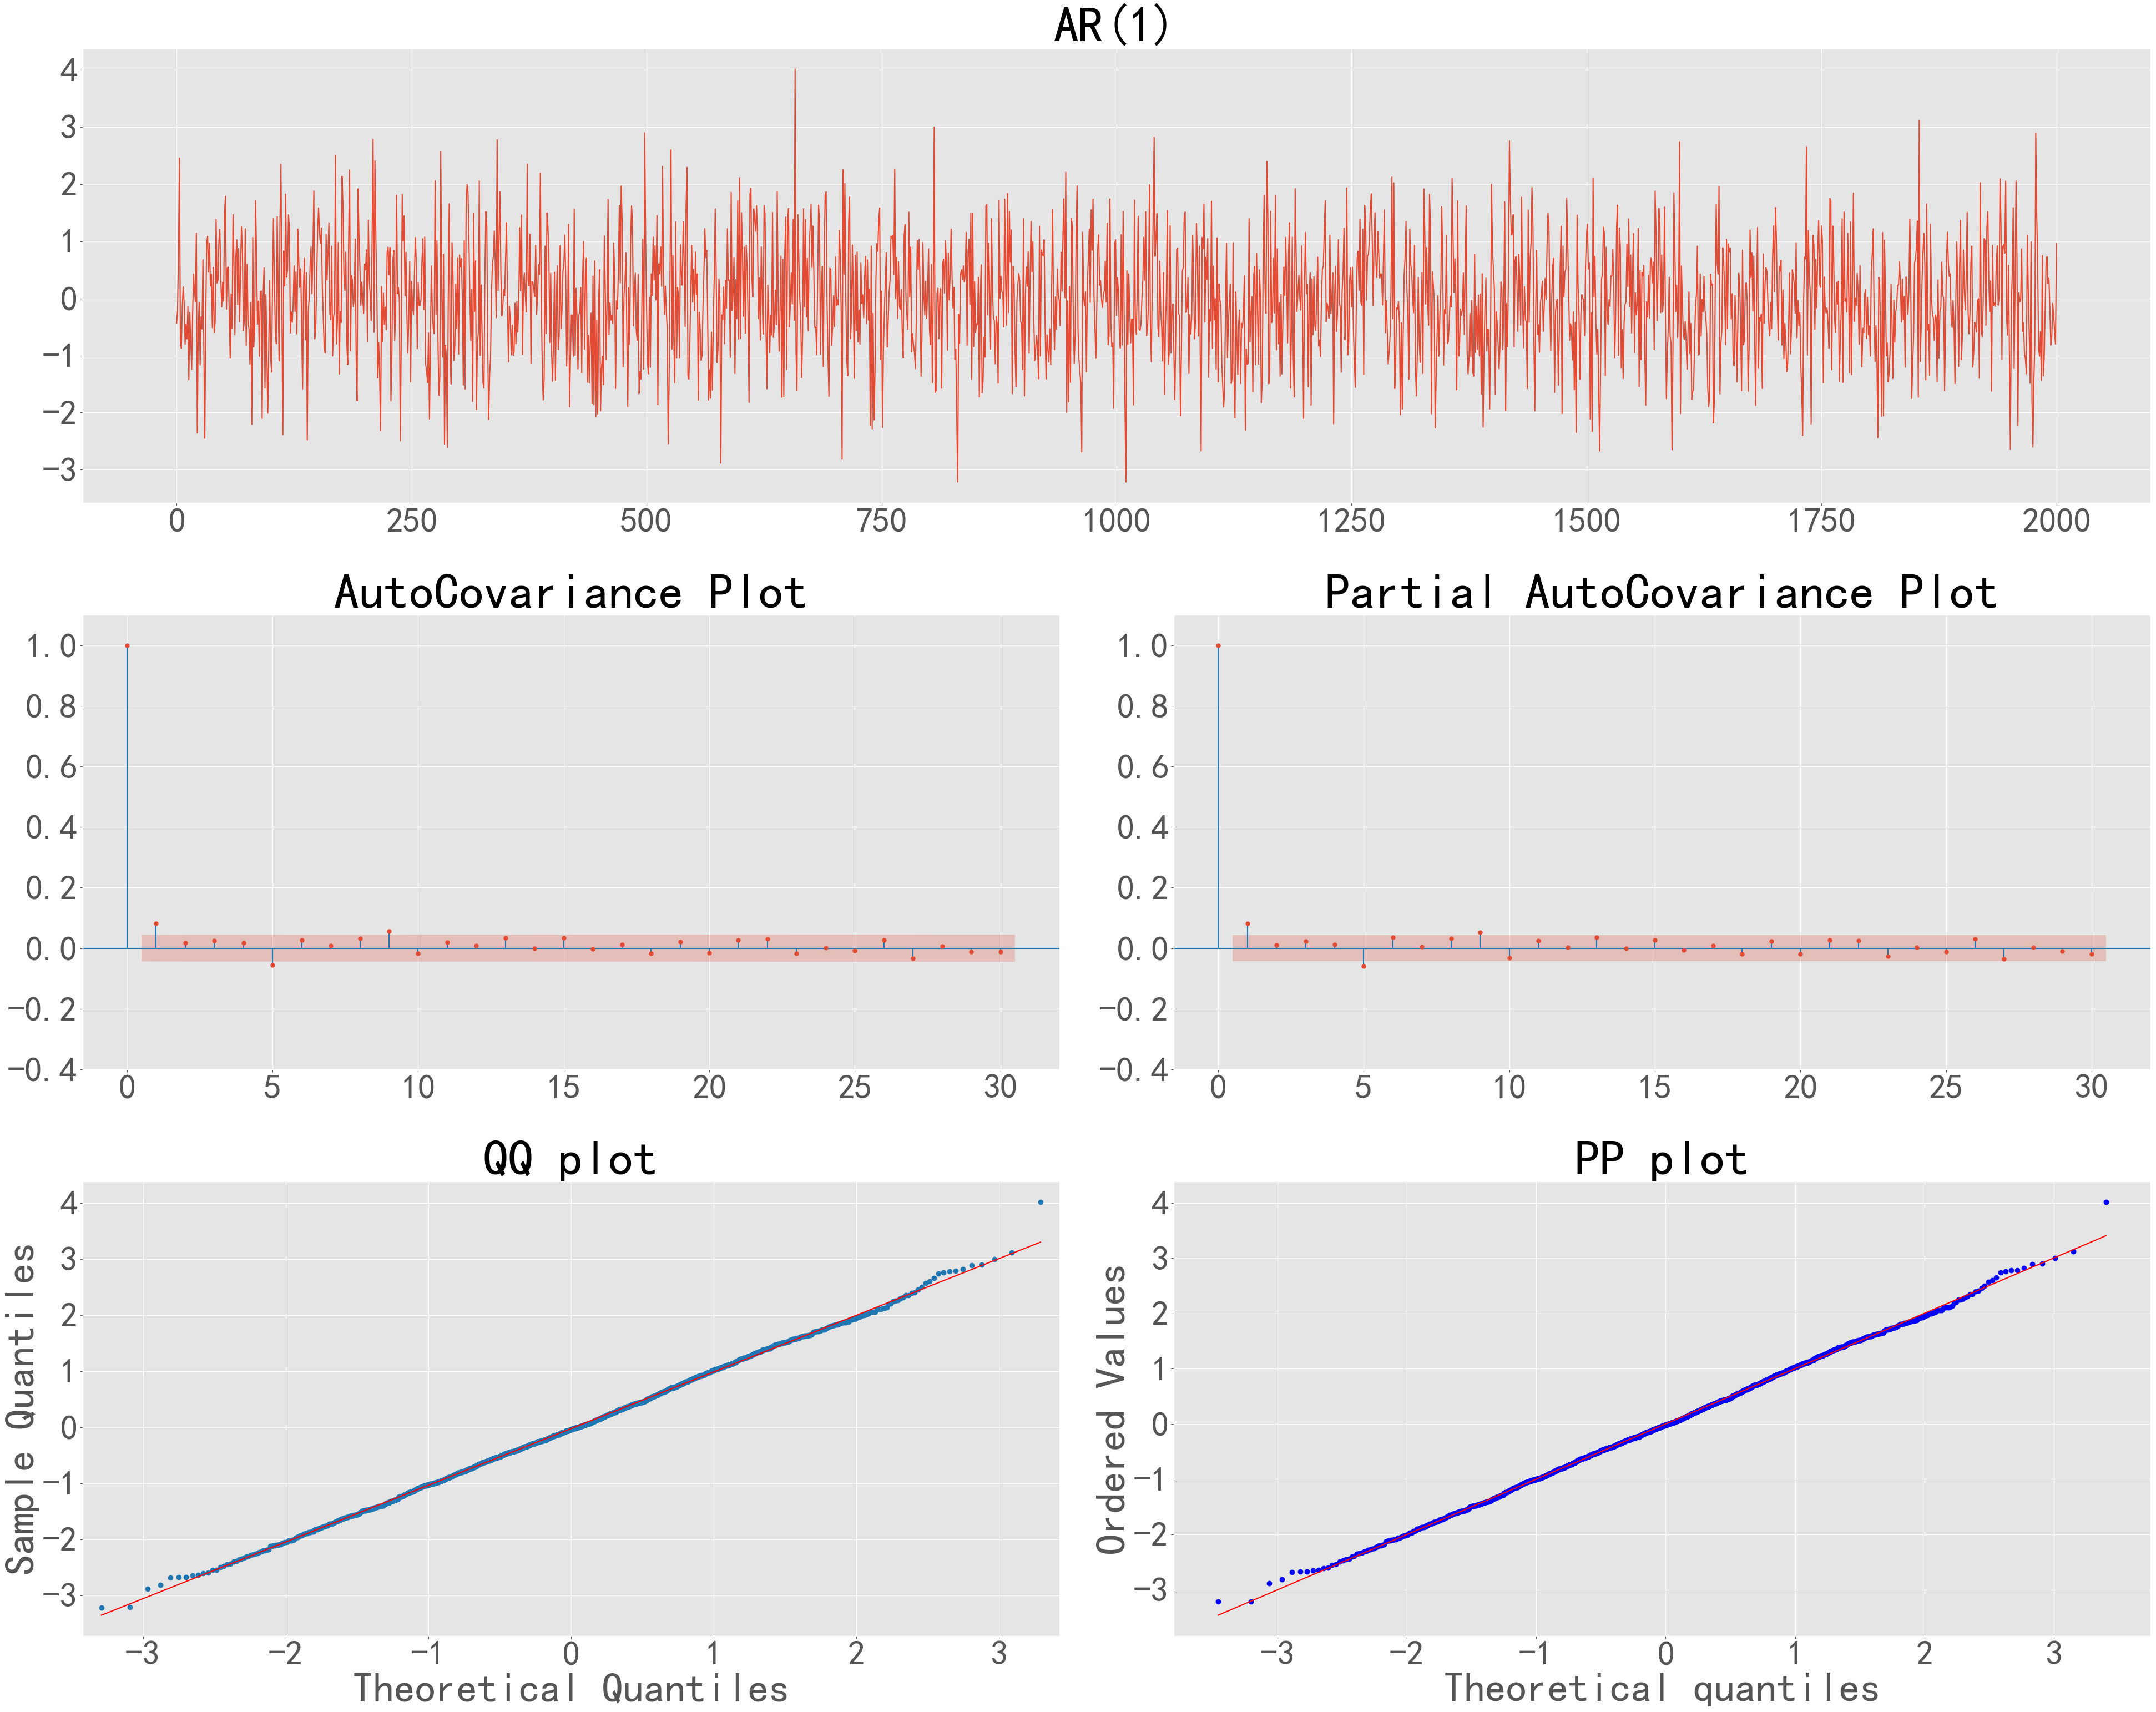

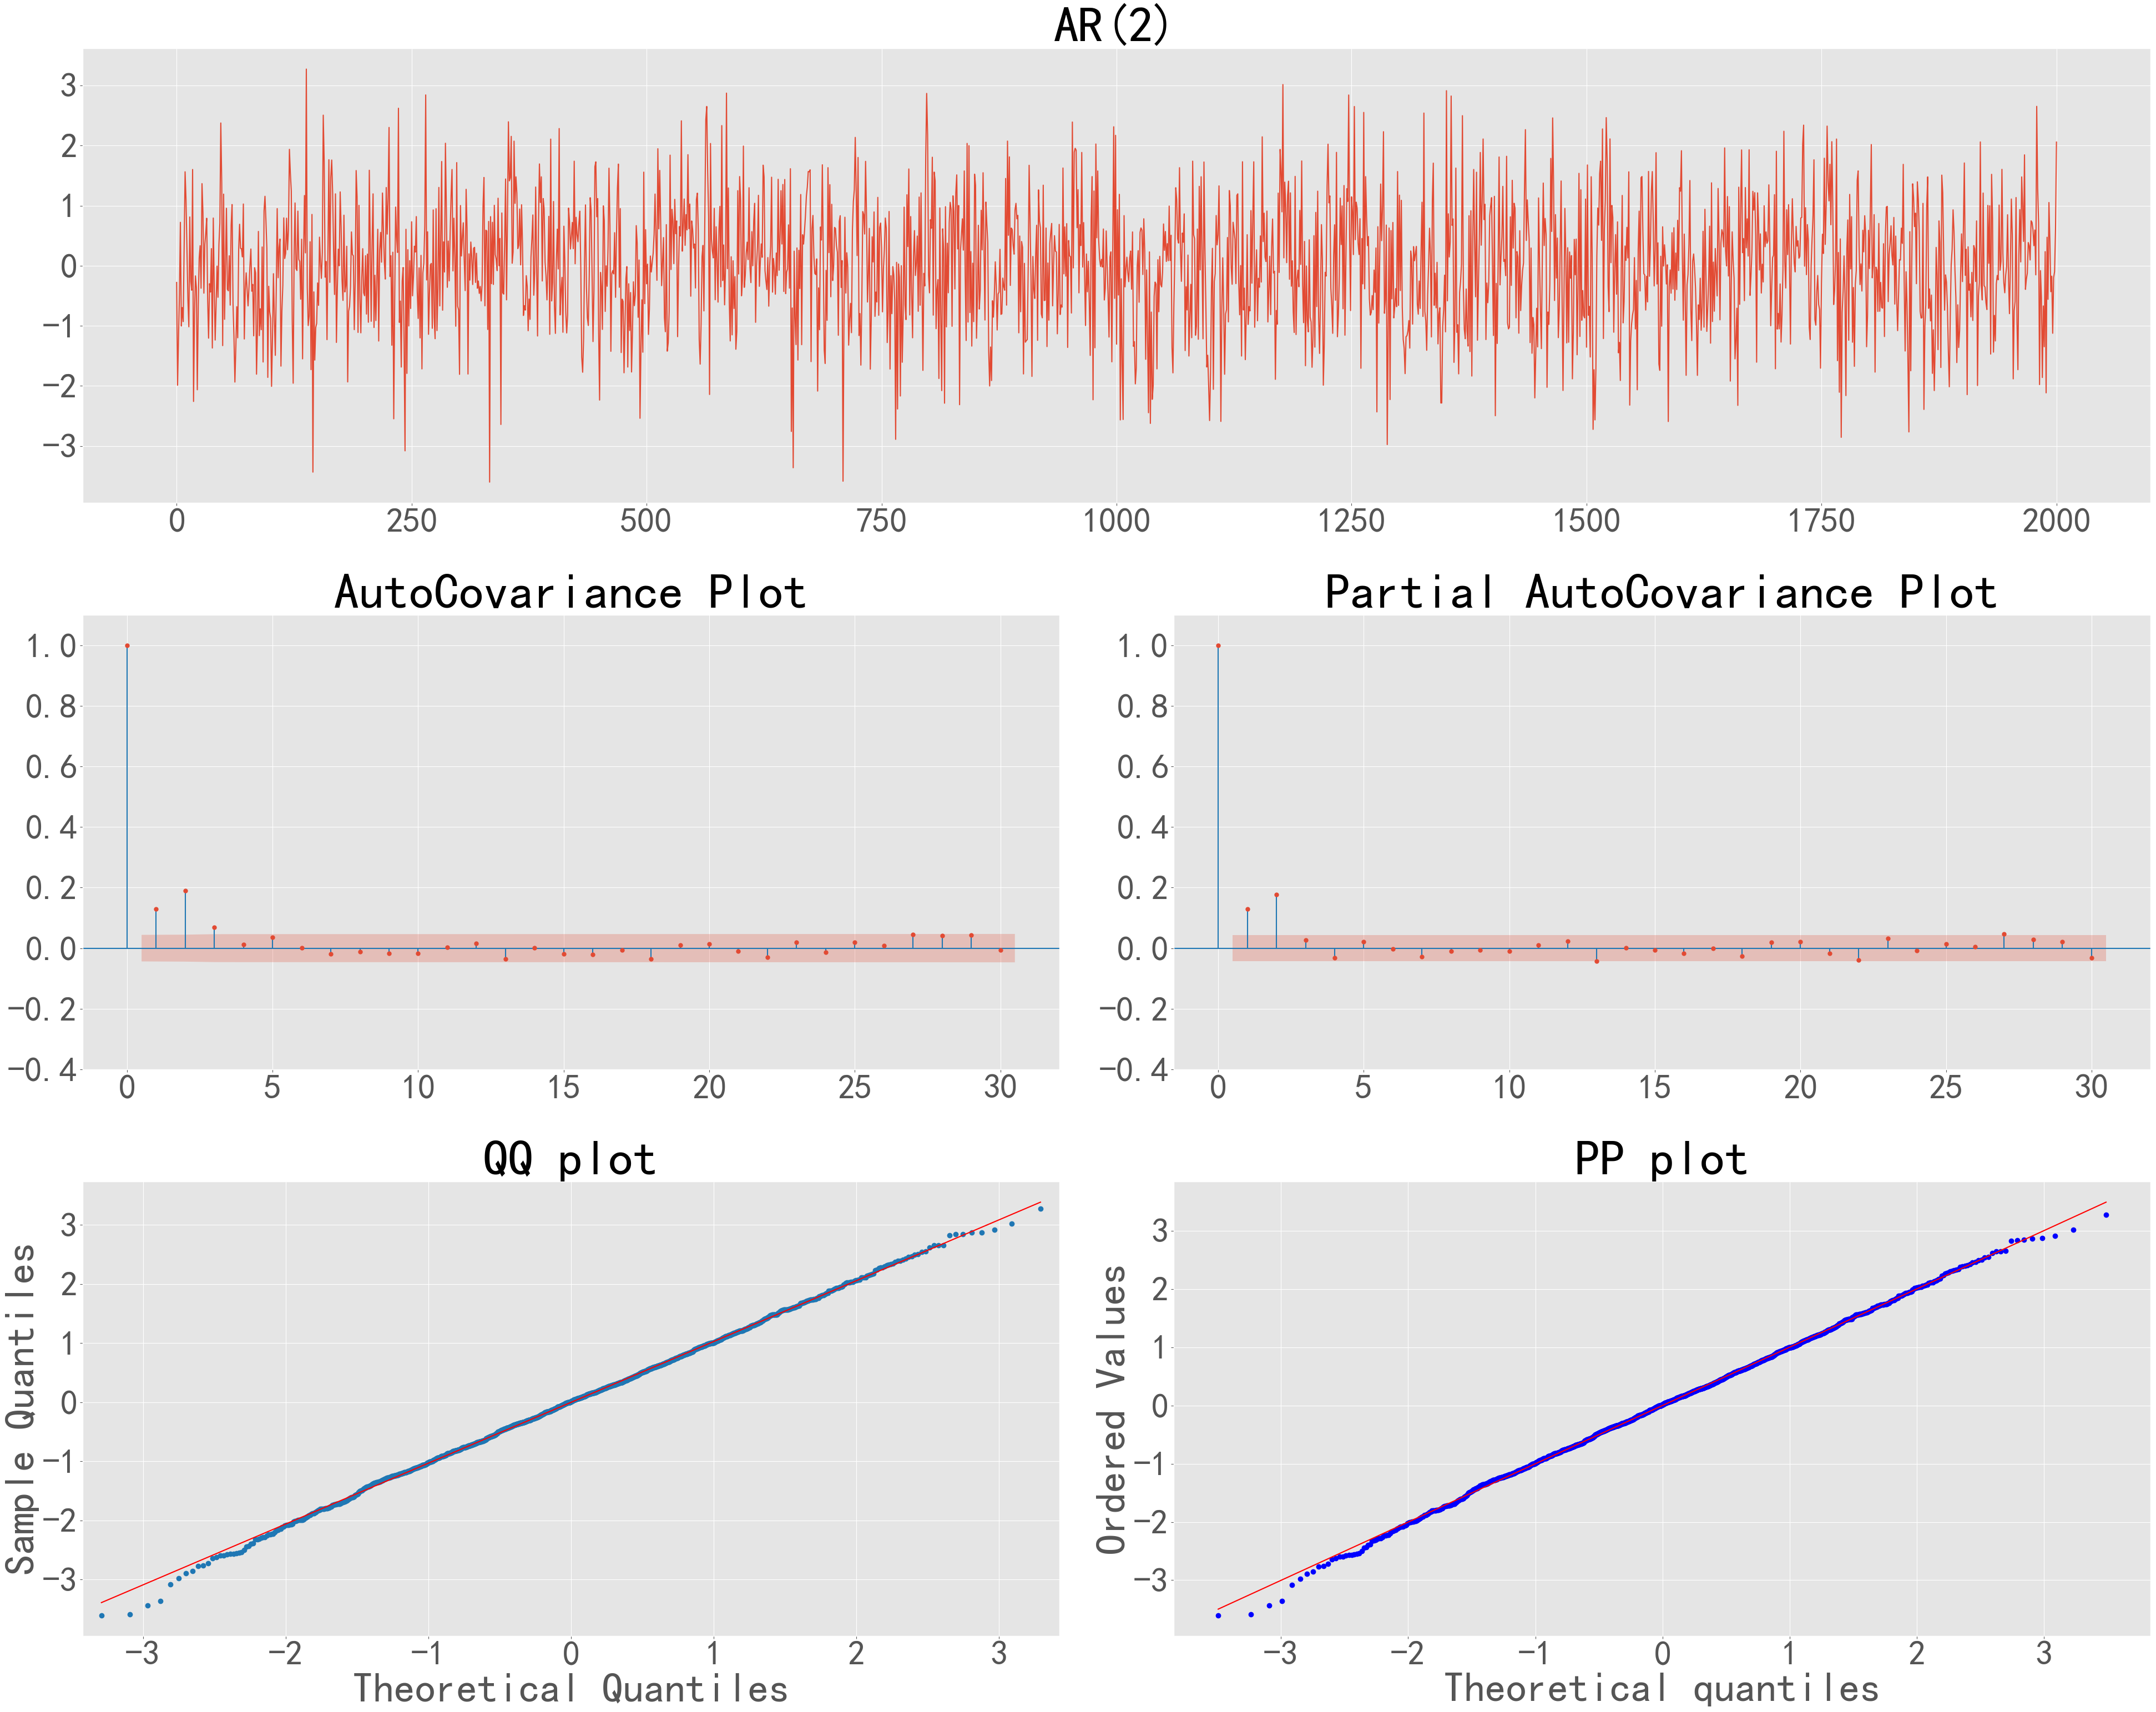

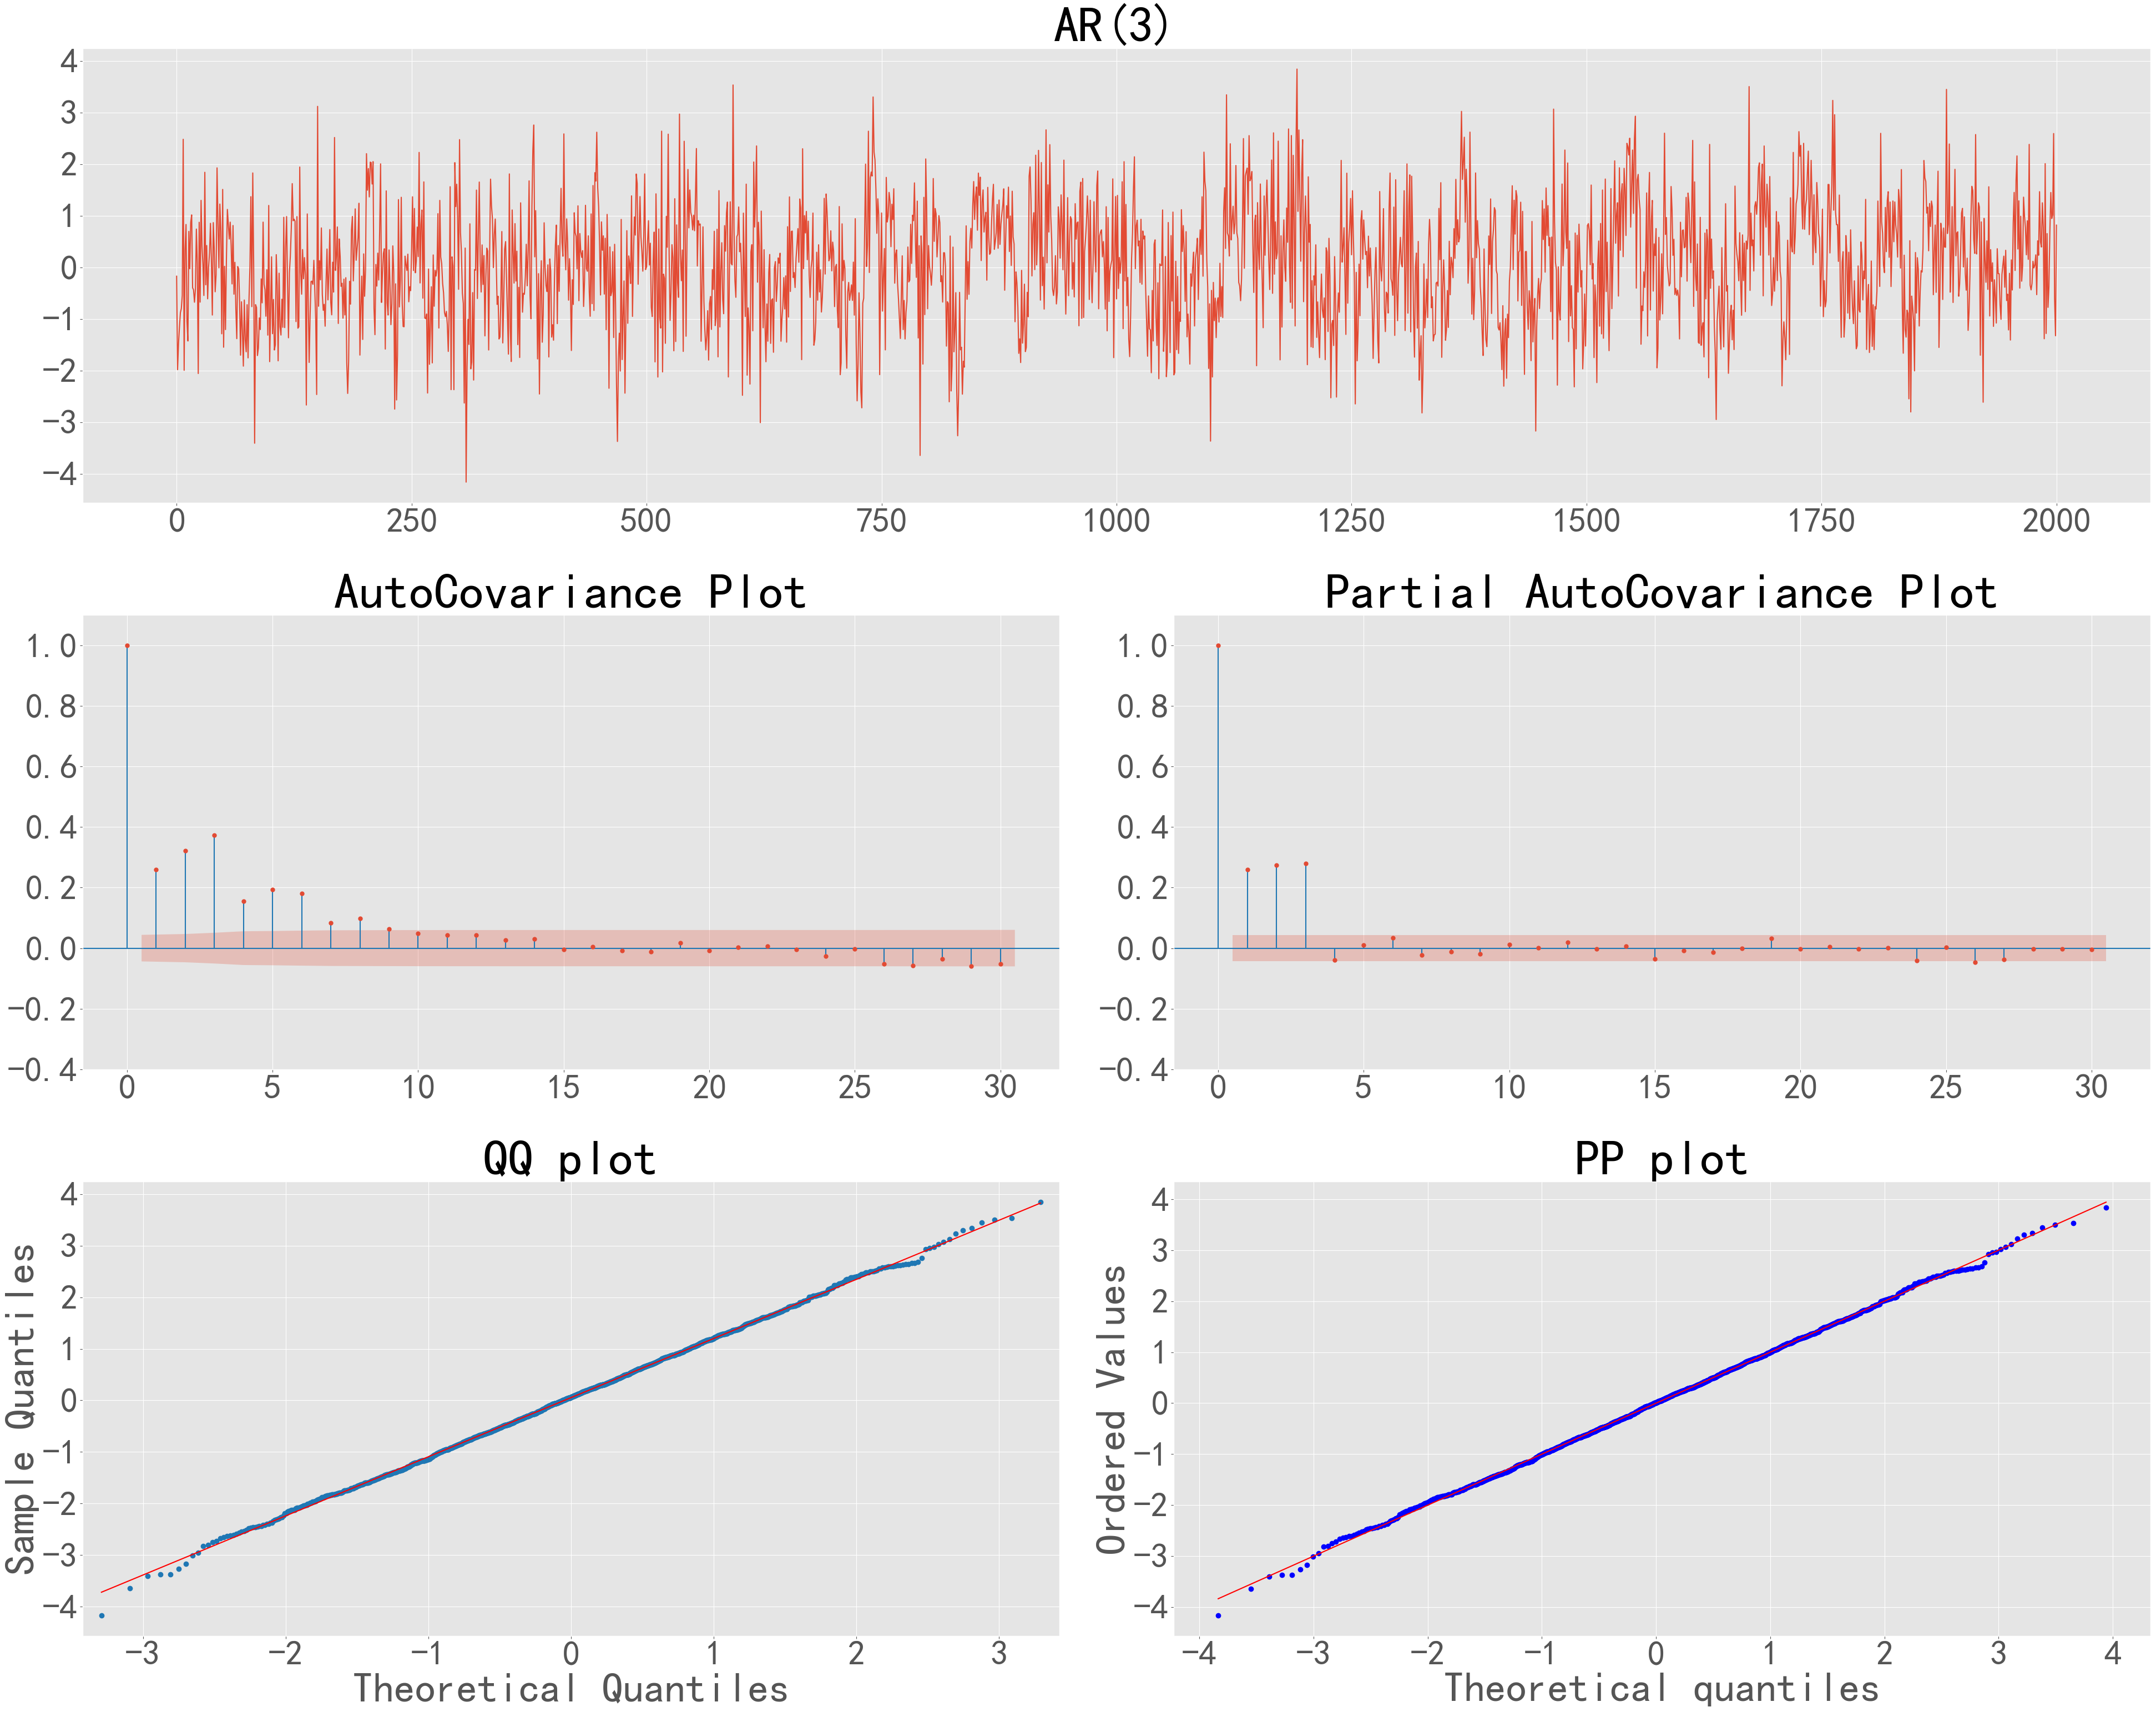

In [187]:
pars=[0.1,0.2,0.3]

AR1_process(pars[0])
AR2_process(pars[:2])
AR3_process(pars)

In [192]:
def MA1_process(pars):
    e=[]
    y=[]
    y0 = np.random.randn(1)[0]
    e0 = np.random.randn(1)[0]
    e.append(e0)
    y.append(y0)
    
    Mu=1
    for i in range(1,2001):
        tmp_e=np.random.randn(1)[0]
        y.append(tmp_e+Mu+pars*e[i-1])
        e.append(tmp_e)
            
    title="MA(1)"
    ARMA_plot(title,y,30)

def MA2_process(pars):
    e=[]
    y=[]
    Mu=1
    y0 = np.random.randn(1)[0]
    e0 = np.random.randn(1)[0]
    e1 = np.random.randn(1)[0]
    e.append(e0)
    e.append(e1)
    y1 = np.random.randn(1)[0]
    y.append(y0)
    y.append(y1)
    
    
    for i in range(2,2001):
        tmp_e=np.random.randn(1)[0]
        e.append(tmp_e)
        y.append(tmp_e+Mu+pars[0]*e[i-1]+pars[1]*e[i-2])
        
            
    title="MA(2)"
    ARMA_plot(title,y,30)
    
def MA3_process(pars):
    e=[]
    y=[]
    Mu=1
    y0 = np.random.randn(1)[0]
    e0 = np.random.randn(1)[0]
    e1 = np.random.randn(1)[0]
    e2=np.random.randn(1)[0]
    e.append(e0)
    e.append(e1)
    e.append(e2)
    y1 = np.random.randn(1)[0]
    y2 = np.random.randn(1)[0]
    y.append(y0)
    y.append(y1)
    y.append(y2)
    
    
    for i in range(3,2001):
        tmp_e=np.random.randn(1)[0]
        e.append(tmp_e)
        y.append(tmp_e+Mu+pars[0]*e[i-1]+pars[1]*e[i-2]+pars[2]*e[i-3])
        
            
    title="MA(3)"
    ARMA_plot(title,y,30)

c:\Users\98317\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\98317\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\98317\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


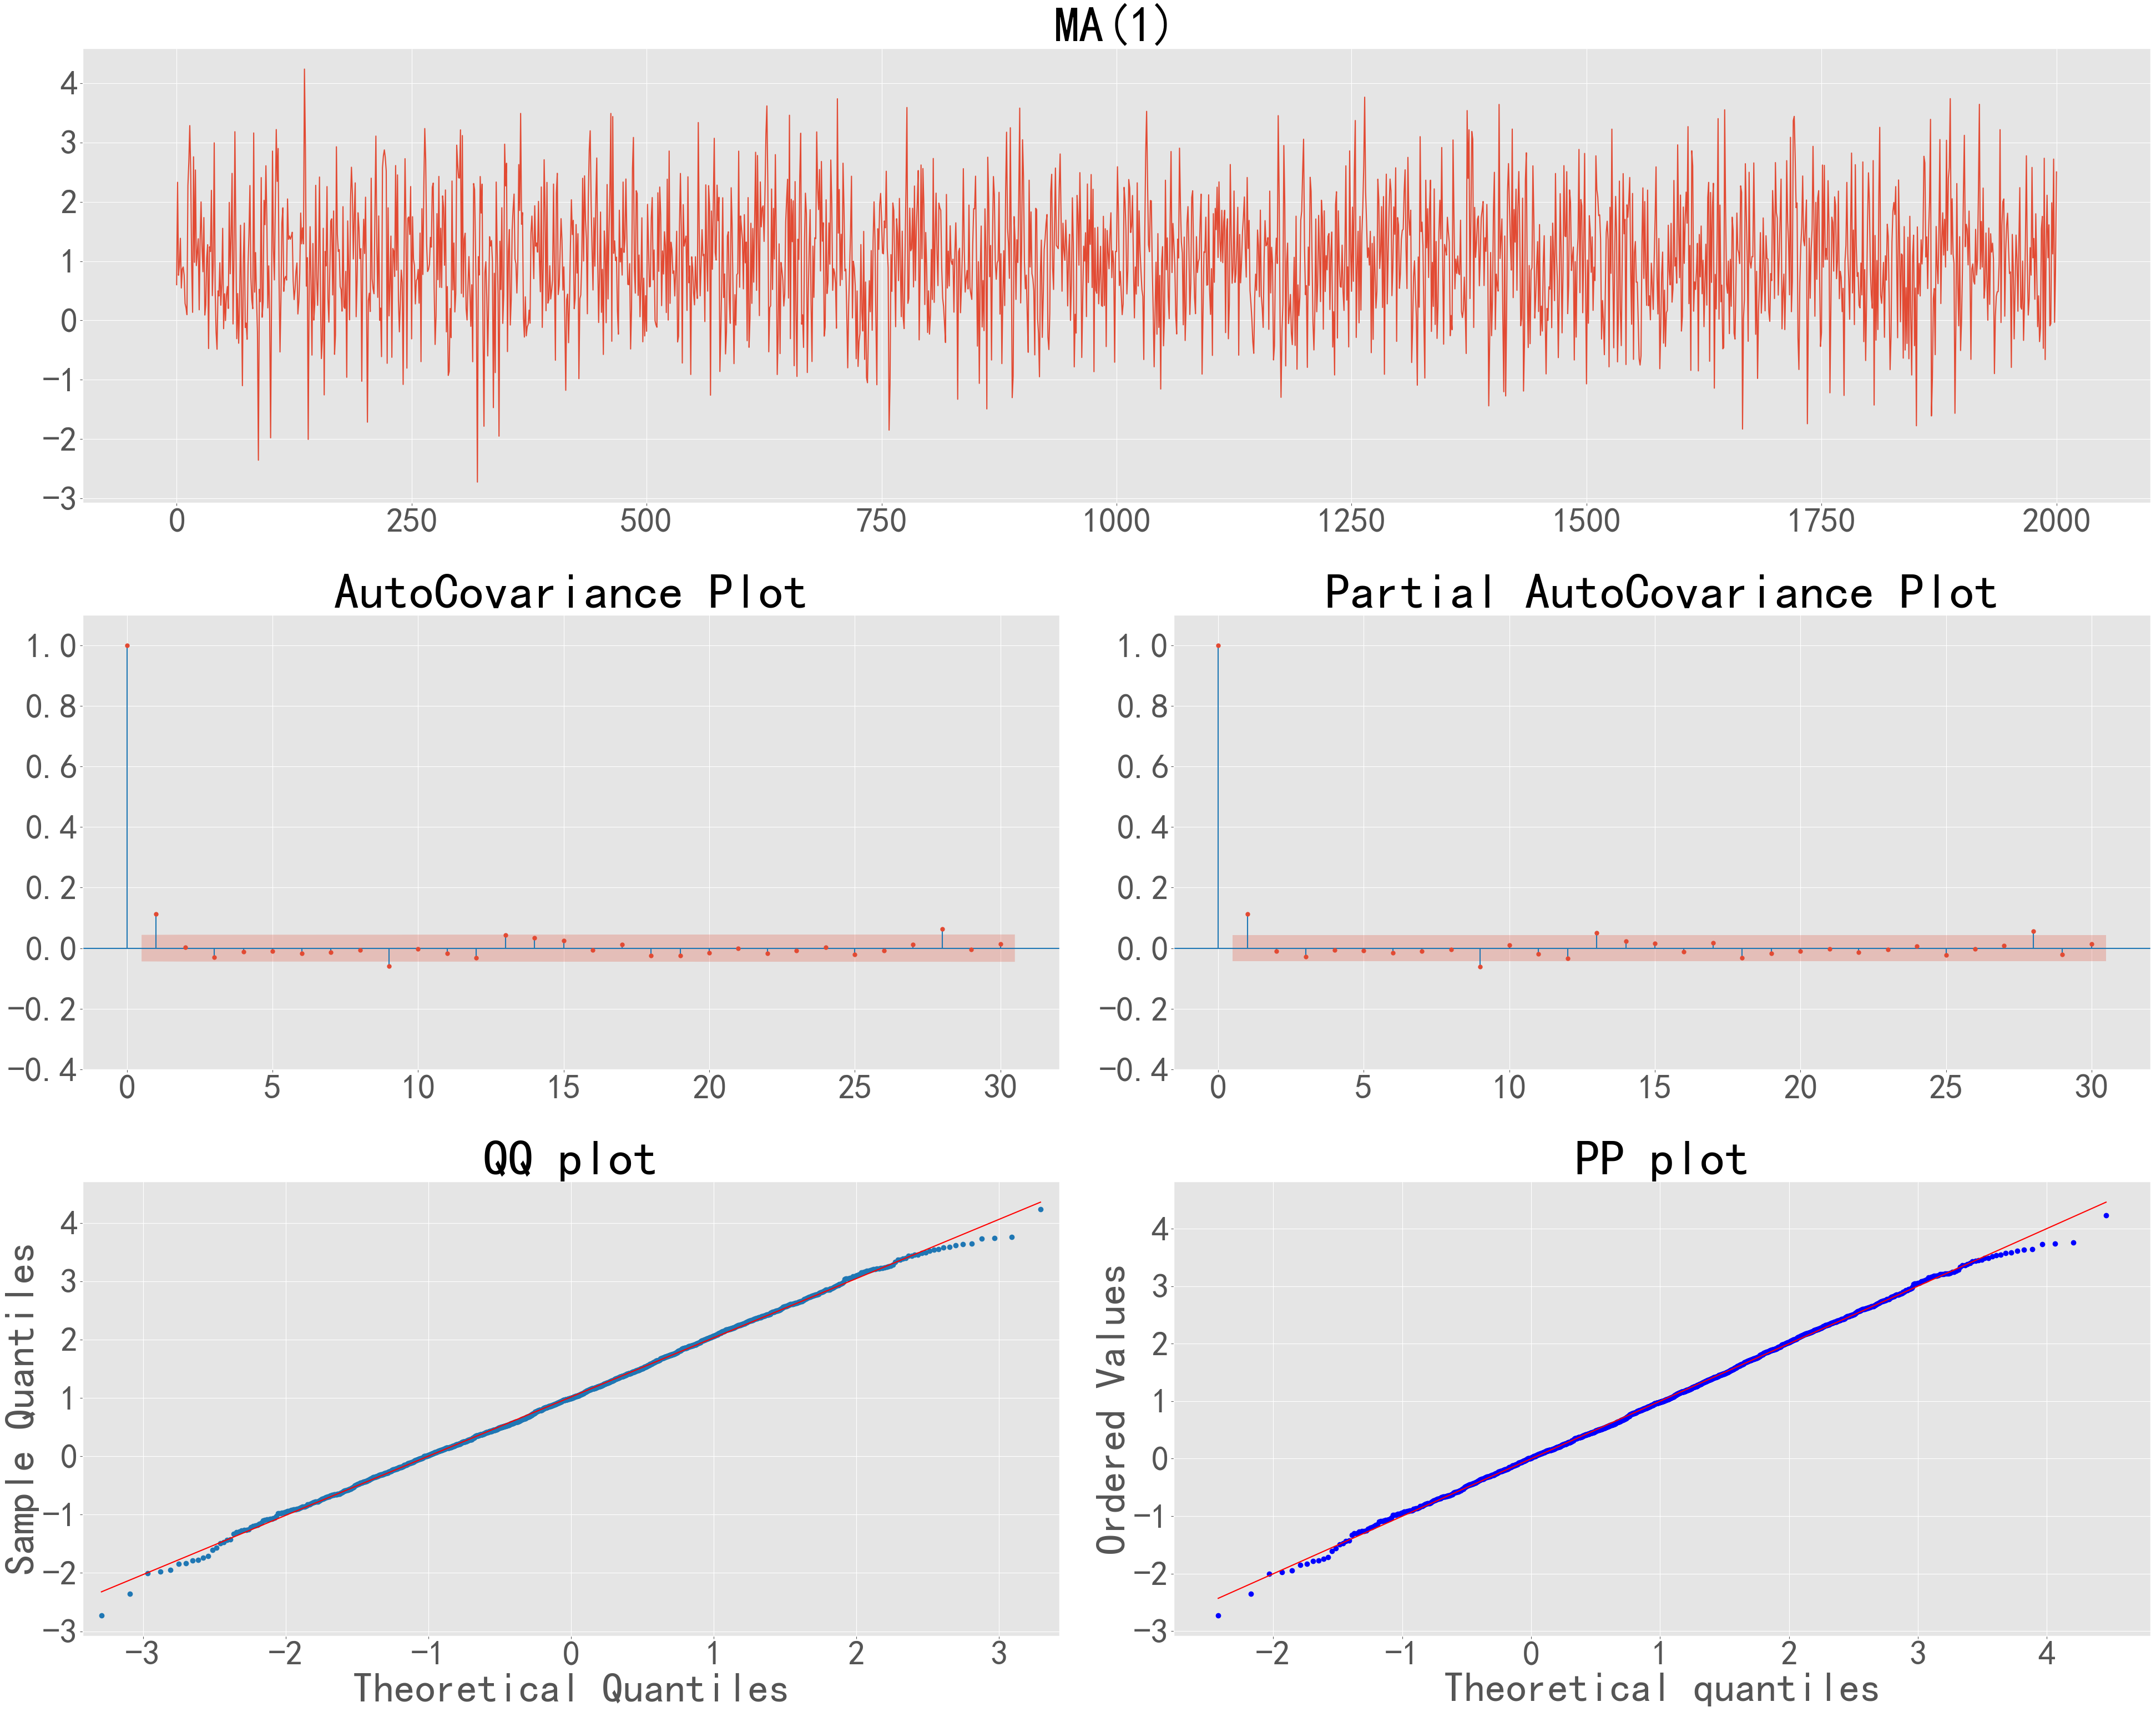

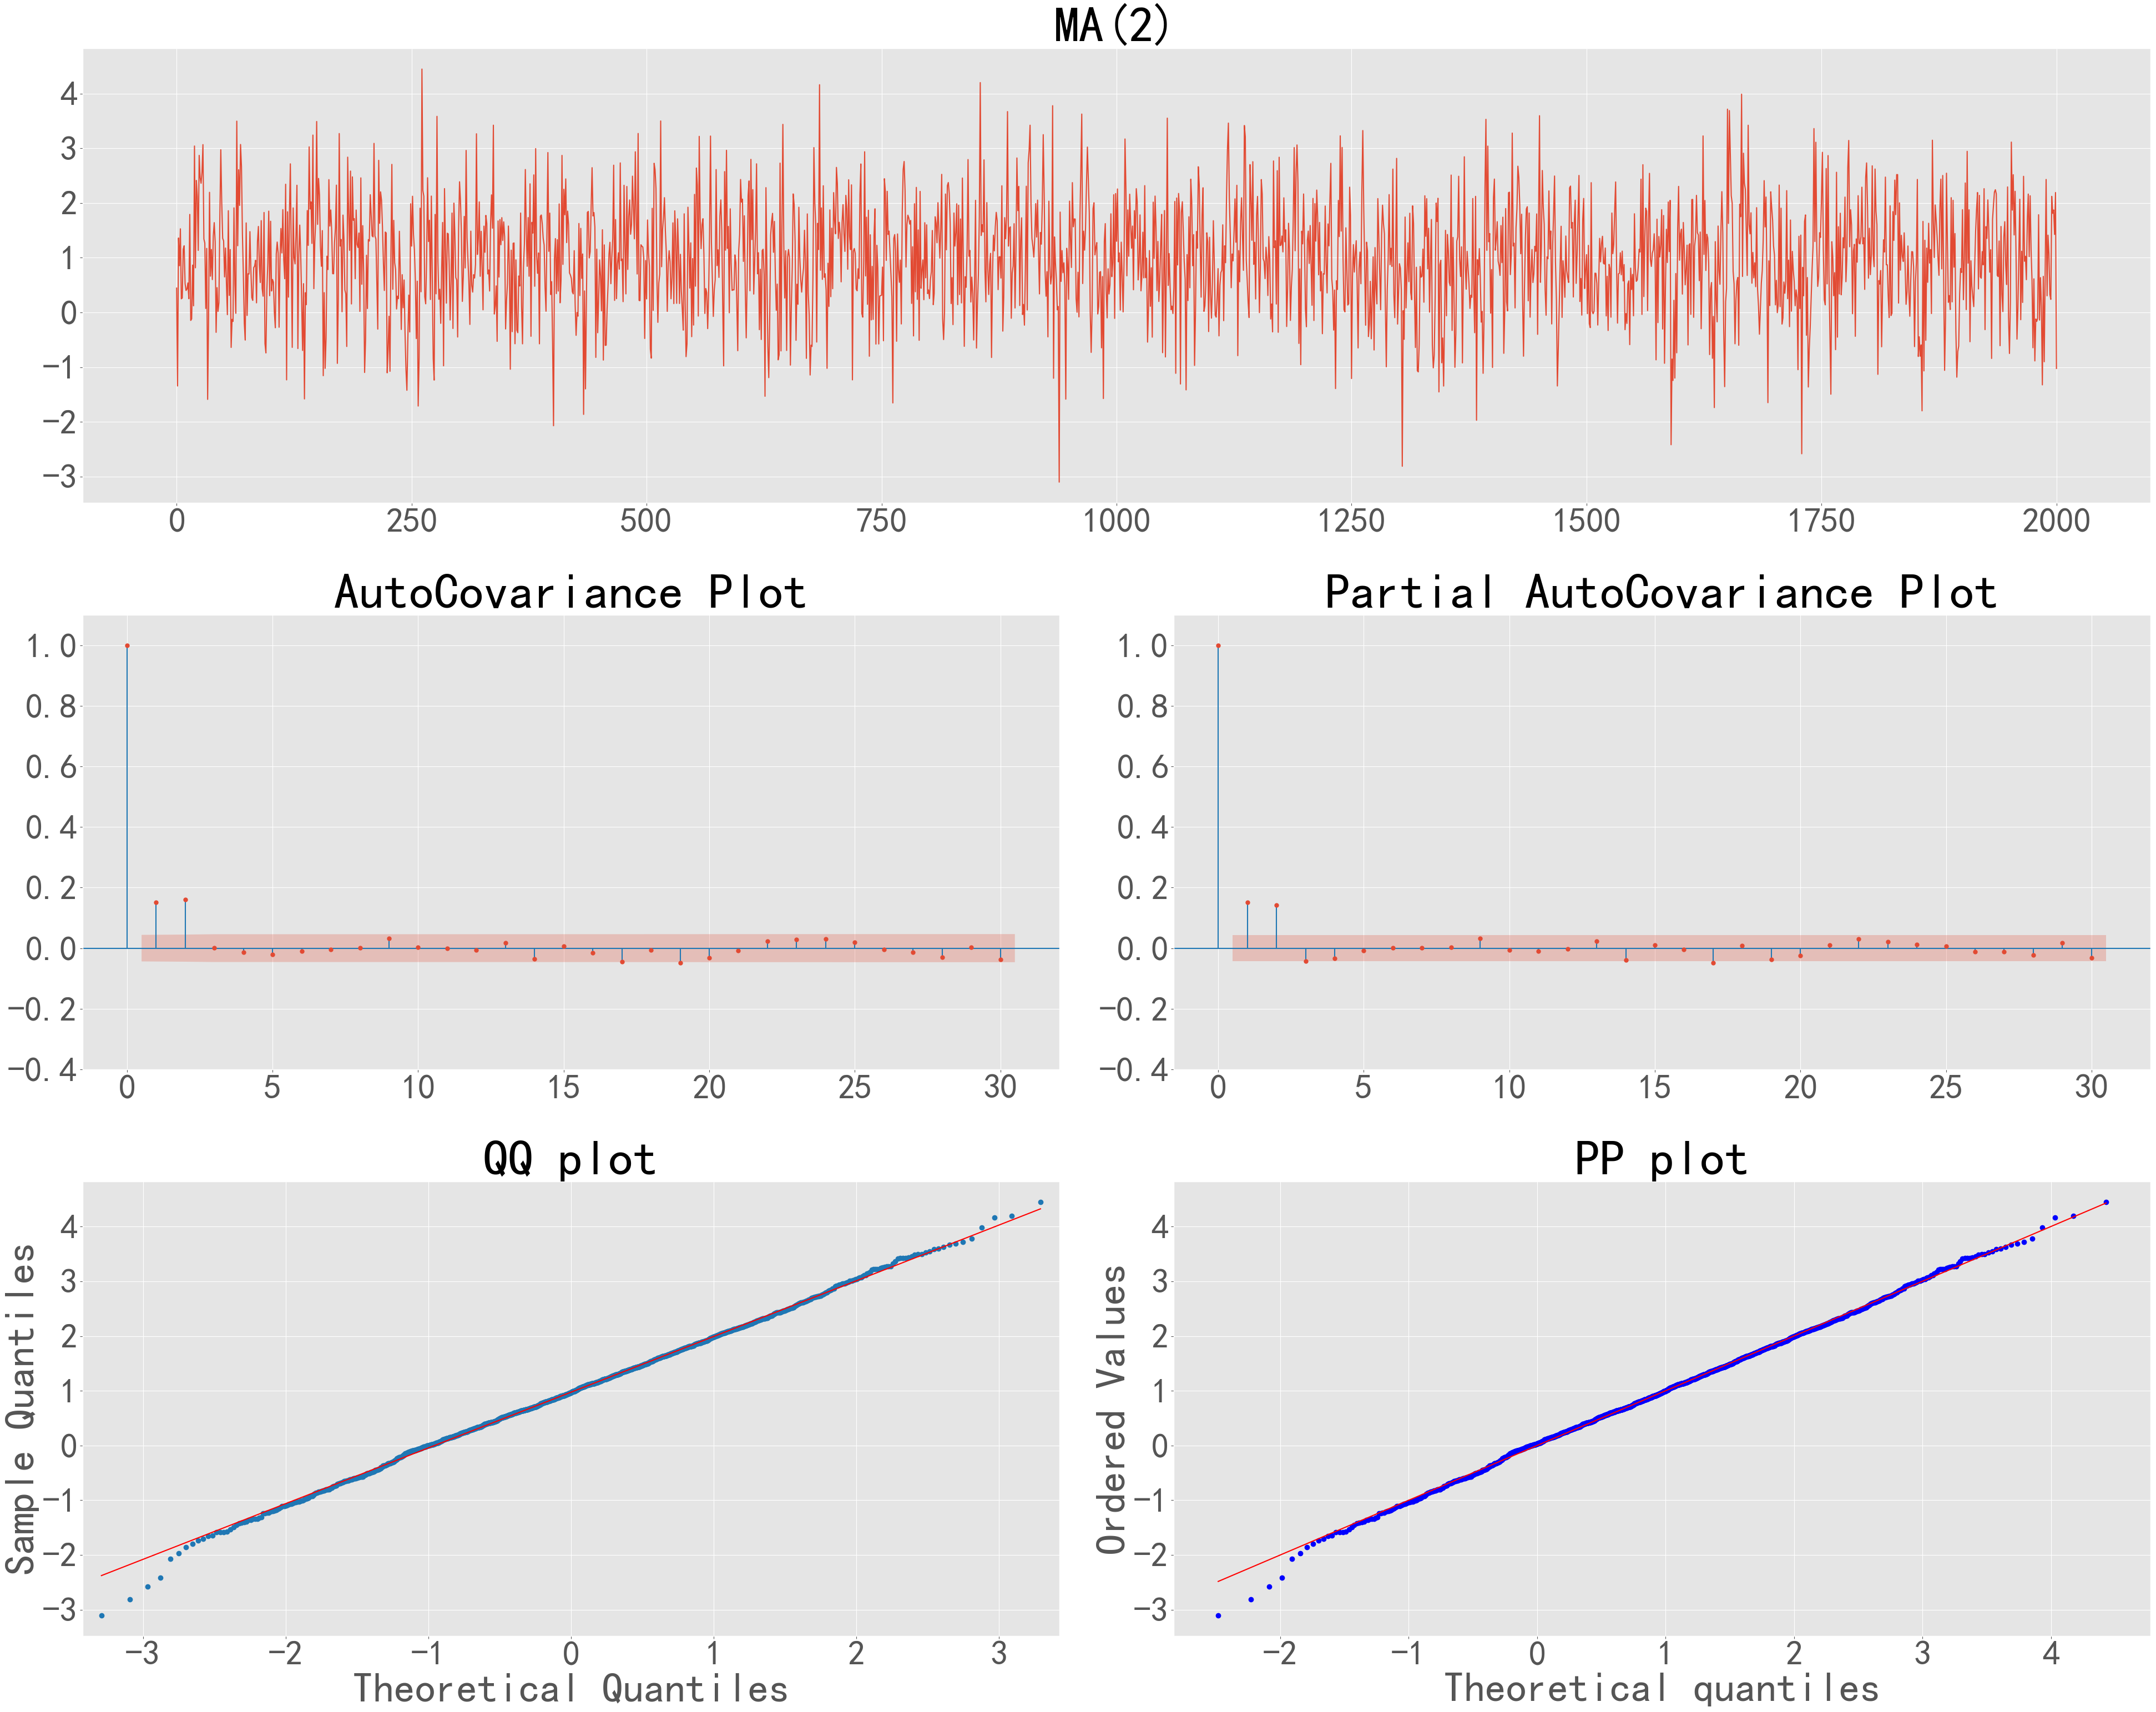

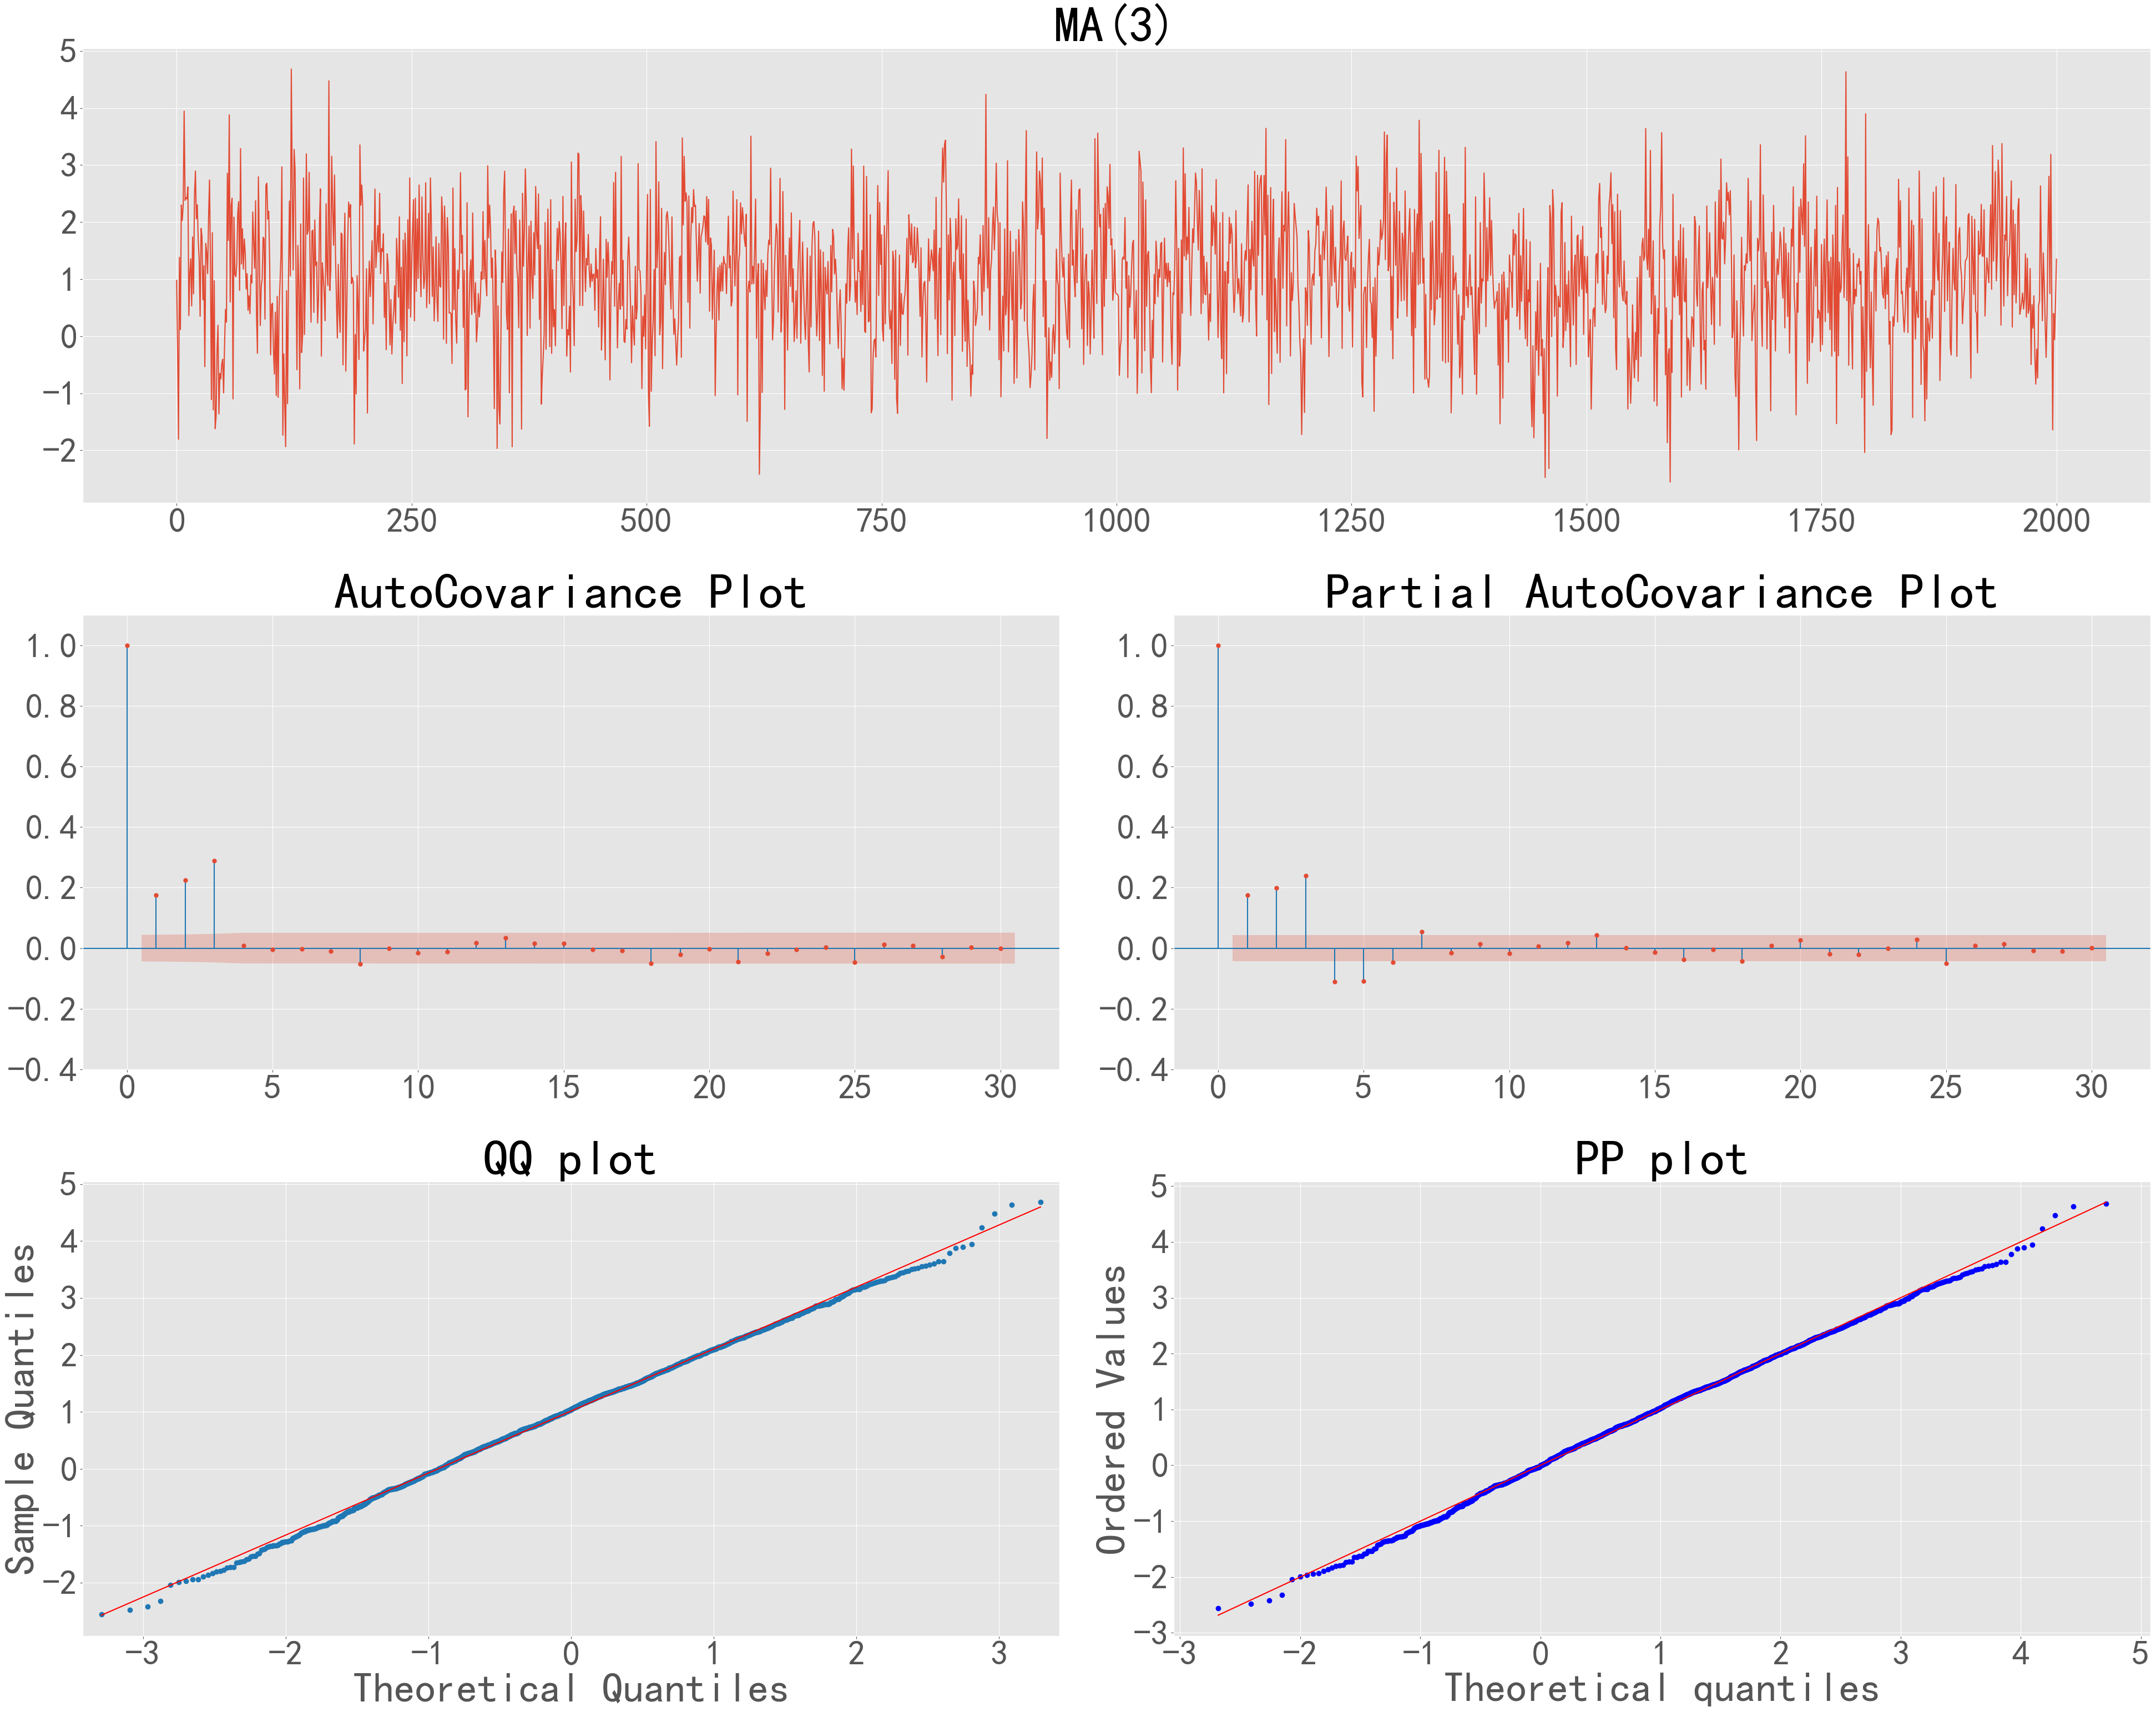

In [193]:
pars=[0.1,0.2,0.3]

MA1_process(pars[0])
MA2_process(pars[:2])
MA3_process(pars)